# Capítulo 4. Programación genética.
> Autor: Natalia Cely Callejas, Ronald Arturo Chavez.\
> Universidad Nacional de Colombia  
> Junio 1, 2025

## Introducción
La programación genética es una técnica avanzada de inteligencia artificial que se inspira en los principios de la evolución biológica, al igual que los algoritmos genéticos. Sin embargo, se diferencia por su mayor complejidad estructural, ya que utiliza árboles sintácticos (binarios o no binarios) como representación principal de las soluciones. Estos árboles actúan como programas completos, donde cada nodo puede ser una función, un operador lógico o aritmético, y cada hoja representa variables o constantes. De forma general, el árbol define una secuencia de instrucciones que busca resolver una tarea específica de forma autónoma. Esta técnica se utiliza especialmente para generar programas que se adaptan y mejoran con el tiempo, optimizando su desempeño con respecto a una función de aptitud, que evalúa la idoneidad de cada programa para cumplir el objetivo deseado. El proceso evolutivo en la programación genética se basa en mecanismos como la selección, el cruce y la mutación, que permiten recombinar y modificar fragmentos de código para explorar nuevas soluciones. A través de múltiples generaciones, la población de programas evoluciona, produciendo versiones más eficientes, lo que convierte a la programación genética en una herramienta poderosa para la solución de problemas complejos donde el universo de búsqueda es amplio y poco estructurado.

## Ejemplos en MEPX
MEPX es un software de análisis de datos basado en tablas, que permite realizar la transformación, visualización y pronóstico de datos futuros utilizando programación genética, de manera intrínseca cuenta con unos ejemplos para visualizar como se verán los datos y validaciones  de casos ya probados, estos ejemplos ayudan a los nuevos usuarios a familiarizarse con el entorno, el software y la forma de representación de resultados. Para este reporte se ejecutó el ejemplo de MEPX correspondiente a datos de prognósticos por diabetes inicialmente se obtiene el reporte del comportamiento:

![Comprotamiento de MEPX](Multimedia/validación-MEPX.png)

Donde se observa un span de entrenamiento de 10 generaciones y las demás de validación, por lo que elporcentaje de aciertos es de 22%, de la misma manera se observa el comportamiento en sus valores nominales (booleanos) mostrando en rojo el valor objetivo y el azul y el valor obtenido, por lo que los aciertos se observan como pnto coincidentes mientras que los errores se reflejan como lineas distantes entre el objetivo y el valor obtenido.
![Valores nominales de MEPX](Multimedia/Training-MEPX.png)

### Conclusión
Se puede concluir entonces la dificultad de entrenar un modelo unicamente con 10 generaciones ya que su comportamiento esta *over-tuned* y no es representativo sobre la población total. Sin embargo, se resalta el valor agregado del programa por si mismo, puesto que brinda herramientas muy útiles como la implementación de código en C++ listo para ser usado, o la visualización misma de los resultados, lo que lo cnvierte en un software altamente útil.

## Diseño de un circuito codificador de 7 segmentos con PG.



## Diseño del recorrido de un robot con PG.
Considerando un robot que le entrega galletas a un grupo de ingenieros diseñadores, en una sala cuadrada se obtienen entonces los parámetros de la programación genética: conjunto de terminales, conjunto de funciones y función de aptitud. Todo esto considerando un sistema de validación por medio de puntos, cada vez que un ingeniero recibe una galleta gana puntos. 

### Conjunto de terminales. 
Son los datos concretos que el programa puede utilizar para nutrirse. 
- Posiciones en la sala.
- Coordenadas de los ingenieros.
- Posición actual del robot.

### Conjunto de funciones.
Son los nodos en medio, operaciones que modifican los terminales.
- Moverse en cada dirección, una cantidad determinada de casillas.
- Condicionales de toma de decisión.
- Cálculos de distancia entre el robot y el ingeniero.

### Función de aptitud.
Puede indicar los objetivos, lo que harían una solución mejor que otra en función de sus beneficios.
- Maximizar las galletas entregadas.
- Minimizar la cantidad de pasos dados.
- Evitar que el robot se salga de los límites.

Generación 400 - Mejor aptitud: -16


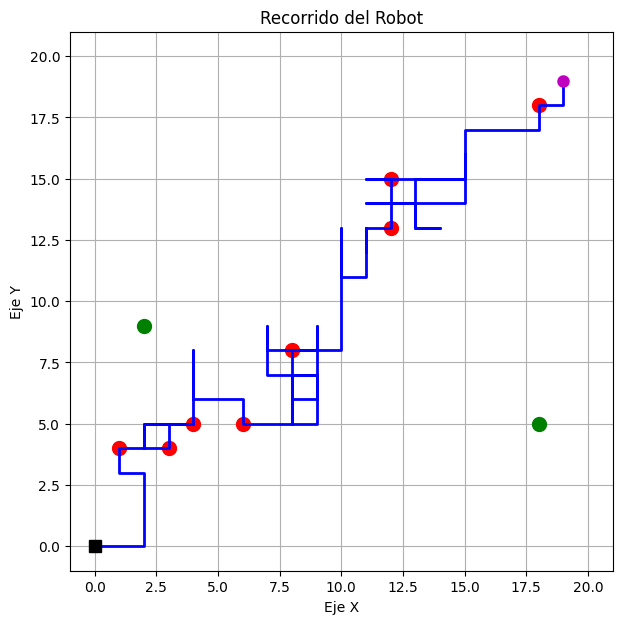

Generación 800 - Mejor aptitud: -13


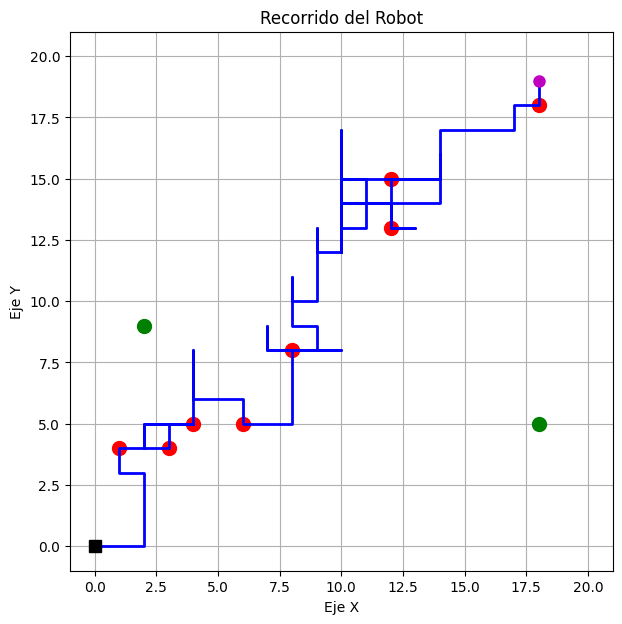

Generación 1200 - Mejor aptitud: -12


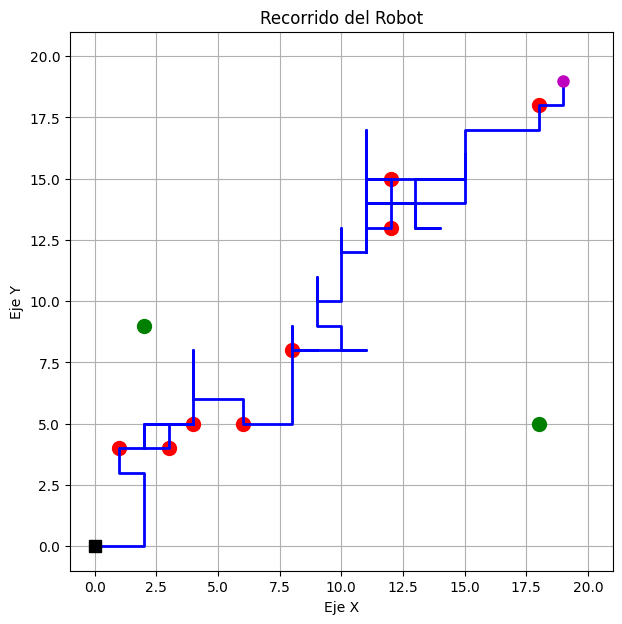

Generación 1600 - Mejor aptitud: -11


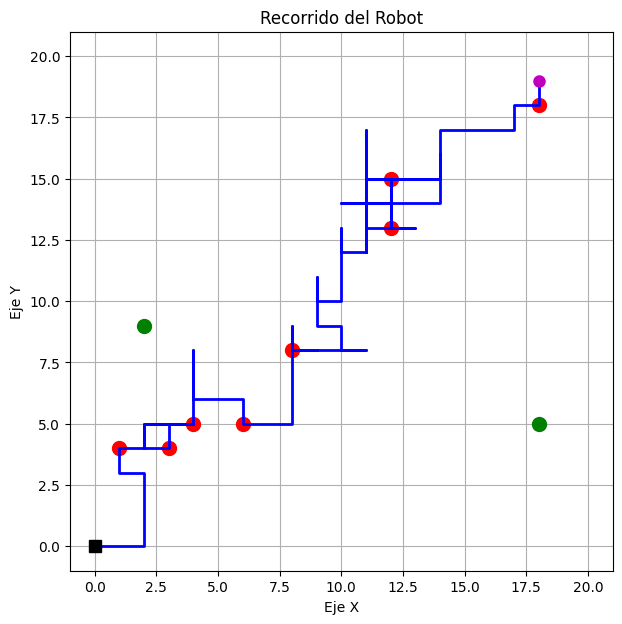

Generación 2000 - Mejor aptitud: -9


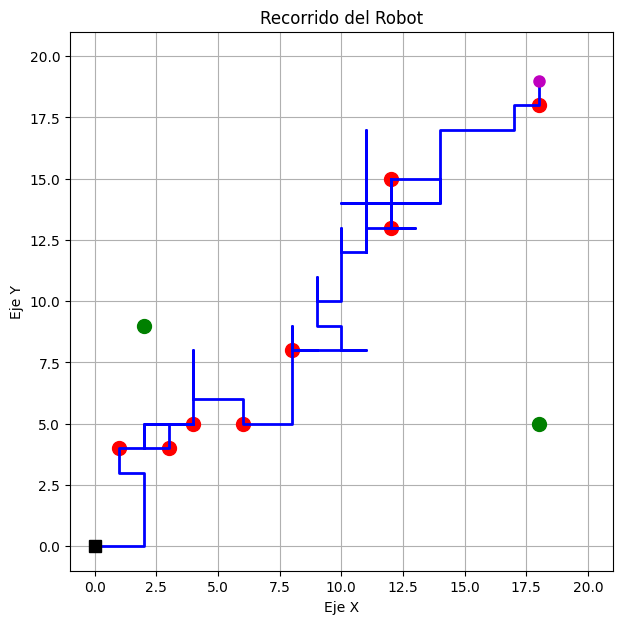


Mejor programa encontrado:
[('mover_derecha', 2), ('mover_abajo', 2), ('mover_abajo', 1), ('mover_izquierda', 1), ('mover_abajo', 1), ('mover_derecha', 1), ('mover_abajo', 1), ('mover_derecha', 2), ('mover_izquierda', 2), ('mover_arriba', 1), ('mover_derecha', 1), ('mover_abajo', 1), ('mover_derecha', 1), ('mover_abajo', 1), ('mover_abajo', 2), ('mover_arriba', 2), ('mover_derecha', 1), ('mover_derecha', 1), ('mover_arriba', 1), ('mover_derecha', 2), ('mover_abajo', 2), ('mover_abajo', 1), ('mover_derecha', 1), ('mover_izquierda', 1), ('mover_abajo', 1), ('mover_arriba', 1), ('mover_derecha', 2), ('mover_derecha', 1), ('mover_izquierda', 1), ('mover_abajo', 1), ('mover_izquierda', 1), ('mover_abajo', 2), ('mover_arriba', 1), ('mover_derecha', 1), ('mover_abajo', 2), ('mover_abajo', 1), ('mover_arriba', 1), ('mover_derecha', 1), ('mover_abajo', 2), ('mover_abajo', 2), ('mover_abajo', 1), ('mover_arriba', 2), ('mover_arriba', 1), ('mover_arriba', 1), ('mover_arriba', 1), ('mover_abajo',

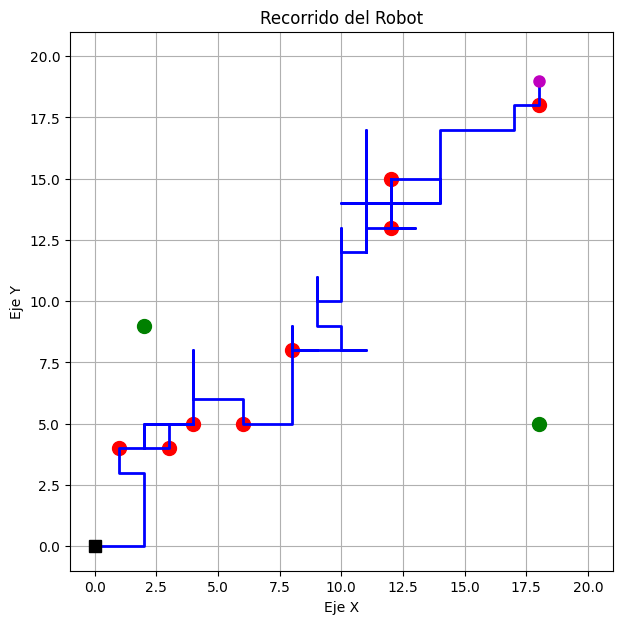

In [16]:
# Programación Genética optimizada para el recorrido del robot que entrega galletas (versión rápida)
import numpy as np
import matplotlib.pyplot as plt
import random

# Parámetros de la sala y posiciones de ingenieros
Lim_sala = [20, 20]
coordenadas_ing = np.array([
    [1, 4],
    [4, 5],
    [3, 4],
    [6, 5],
    [8, 8],
    [2, 9],
    [12, 15],
    [12, 13],
    [18, 5],
    [18, 18]
])

acciones_posibles = ["mover_arriba", "mover_abajo", "mover_derecha", "mover_izquierda"]

# Simulador de recorrido
def simular_recorrido(programa, Lim_sala, coordenadas_ing):
    pos_robot = [0, 0]
    pasos = 0
    galletas_entregadas = 0
    salir = False
    entregados = set()

    for instruccion in programa:
        accion, valor = instruccion

        if accion == "mover_arriba":
            pos_robot[1] -= valor
        elif accion == "mover_abajo":
            pos_robot[1] += valor
        elif accion == "mover_derecha":
            pos_robot[0] += valor
        elif accion == "mover_izquierda":
            pos_robot[0] -= valor

        pasos += valor

        if pos_robot[0] < 0 or pos_robot[1] < 0 or pos_robot[0] >= Lim_sala[0] or pos_robot[1] >= Lim_sala[1]:
            salir = True

        for idx, ing in enumerate(coordenadas_ing):
            if pos_robot == list(ing) and idx not in entregados:
                galletas_entregadas += 1
                entregados.add(idx)

    return galletas_entregadas, pasos, salir

# Visualización del recorrido
def visualizar_recorrido(programa, Lim_sala, coordenadas_ing):
    pos_robot = [0, 0]
    recorrido_x = [pos_robot[0]]
    recorrido_y = [pos_robot[1]]
    entregados = set()

    for instruccion in programa:
        accion, valor = instruccion

        if accion == "mover_arriba":
            pos_robot[1] -= valor
        elif accion == "mover_abajo":
            pos_robot[1] += valor
        elif accion == "mover_derecha":
            pos_robot[0] += valor
        elif accion == "mover_izquierda":
            pos_robot[0] -= valor

        recorrido_x.append(pos_robot[0])
        recorrido_y.append(pos_robot[1])

        for idx, ing in enumerate(coordenadas_ing):
            if pos_robot == list(ing):
                entregados.add(idx)

    plt.figure(figsize=(7,7))
    plt.xlim(-1, Lim_sala[0] + 1)
    plt.ylim(-1, Lim_sala[1] + 1)
    plt.grid(True)

    for idx, ing in enumerate(coordenadas_ing):
        color = 'ro' if idx in entregados else 'go'
        plt.plot(ing[0], ing[1], color, markersize=10)

    plt.plot(recorrido_x, recorrido_y, 'b-', linewidth=2)
    plt.plot(recorrido_x[0], recorrido_y[0], 'ks', markersize=8)
    plt.plot(recorrido_x[-1], recorrido_y[-1], 'mo', markersize=8)

    plt.title('Recorrido del Robot')
    plt.xlabel('Eje X')
    plt.ylabel('Eje Y')
    plt.show()

# Generación aleatoria de un programa candidato (movimientos cortos)
def generar_programa(longitud):
    return [(random.choice(acciones_posibles), random.randint(1, 2)) for _ in range(longitud)]

# Configuración PG optimizada
P_SIZE = 20
GENERACIONES = 2000
LONG_PROGRAMA = 70
MUTACION_PROB = 0.1

# Inicializar solo programas válidos
poblacion = []
while len(poblacion) < P_SIZE:
    prog = generar_programa(LONG_PROGRAMA)
    galletas, pasos, salir = simular_recorrido(prog, Lim_sala, coordenadas_ing)
    if not salir:
        poblacion.append(prog)

# Algoritmo PG evolucionando programas válidos (con límite de intentos)
for gen in range(GENERACIONES):
    nueva_poblacion = []
    aptitudes = []

    for p in poblacion:
        galletas, pasos, salir = simular_recorrido(p, Lim_sala, coordenadas_ing)
        if salir:
            aptitudes.append(-99999)
        else:
            aptitudes.append((10 * galletas) - (1 * pasos))

    mejor_idx = np.argmax(aptitudes)
    nueva_poblacion.append(poblacion[mejor_idx])  # Elitismo

    validos = [p for i, p in enumerate(poblacion) if aptitudes[i] != -99999]

    while len(nueva_poblacion) < P_SIZE:
        padre1, padre2 = random.choices(validos, k=2)
        punto = random.randint(1, LONG_PROGRAMA - 1)
        hijo = padre1[:punto] + padre2[punto:]

        if random.random() < MUTACION_PROB:
            mut_idx = random.randint(0, LONG_PROGRAMA - 1)
            hijo[mut_idx] = (random.choice(acciones_posibles), random.randint(1, 2))

        intentos = 0
        while intentos < 50:
            galletas, pasos, salir = simular_recorrido(hijo, Lim_sala, coordenadas_ing)
            if not salir:
                nueva_poblacion.append(hijo)
                break
            hijo = generar_programa(LONG_PROGRAMA)
            intentos += 1

    poblacion = nueva_poblacion

    if (gen + 1) % 400 == 0:
        print(f"Generación {gen + 1} - Mejor aptitud: {aptitudes[mejor_idx]}")
        visualizar_recorrido(poblacion[mejor_idx], Lim_sala, coordenadas_ing)

# Visualizar el mejor programa final
mejor_programa = poblacion[np.argmax([evaluar_programa(p) for p in poblacion])]
galletas, pasos, salir = simular_recorrido(mejor_programa, Lim_sala, coordenadas_ing)

print("\nMejor programa encontrado:")
print(mejor_programa)
print(f"Galletas entregadas: {galletas}, Pasos: {pasos}, ¿Salió?: {salir}")
visualizar_recorrido(mejor_programa, Lim_sala, coordenadas_ing)

# Evaluación auxiliar final
def evaluar_programa(programa):
    galletas, pasos, salir = simular_recorrido(programa, Lim_sala, coordenadas_ing)
    if salir:
        return -99999
    return (10 * galletas) - (1 * pasos)


## Aporte de LLMs.

Las herramientas LLM disponibles, sobretodo ChatGPT, fue utilizado para detectar problemas en la programación genética, como filtros de selección muy específicos que generaban demoras en las ejecuciones del código y los criterios de selección por elitismo, para mejorar los valores de aptitud de forma más eficiente. Así, los LLM se utilizaron como herramienta partiendo de una solución planteada para mejorar la calidad y velocidad de su rendimiento, además de compactar el código para disminuir su cost computacional.

## Conclusiones.
La programación genética es una forma eficiente de probar soluciones y encontrar la mejor con respecto a problemas de prueba y error más complejos que los que se pueden solucionar por medio de algoritmos genéticos, lo que genera acciones mucho más elaboradas, como un conjunto de instrucciones, que se prueban como individuos y como conjunto. Abriendo las posibilidades en aplicaciones de planeación y simplificación en patrones que no siguen una ecuación o línea lógica, como la generación de conexiones de bits en un circuito.